In [1]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import normaltest # Importting the normal test 
from scipy.stats import f_oneway

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , BaggingClassifier
from sklearn.model_selection import KFold

In [2]:
# Read Dataset
data = pd.read_csv('Iris_practice.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# As of we don't need the Id columns, we will drop the Id column.
data.drop('Id' , axis = 1 , inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Lets describe the data
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Let's check the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Check the null values.
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Species are the categorical data & based on the SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
# we can predict the species
# Let's check the count of the categorical data
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

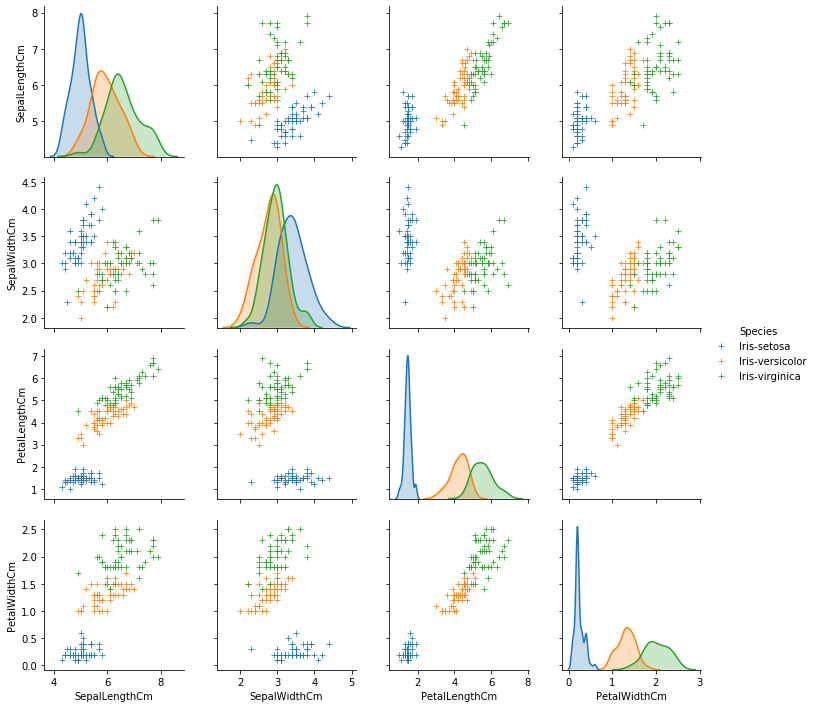

In [8]:
# lets plot a pair plot to check the relationship between the different Species.
sns.pairplot(data , hue = 'Species' , markers = '+')
plt.show()
# Based on the pairplot we can say, there is difference in the mean values of all the numerical variable.
# Lets check the same with the statistical test.

In [9]:
# Since its the classification problem, we need to identify the variables normanlity
# For that we need to perform thr normality test

# H0: Sample comes from the normal distribution
# H1: Sample does not come from normal distribution

for i in data.columns[:-1]:
    print(i)
    print(normaltest(data[i]))
    print('\n')
    
# IF p value is below 0.05 then there is no significant 

SepalLengthCm
NormaltestResult(statistic=5.735584236235733, pvalue=0.05682424941067306)


SepalWidthCm
NormaltestResult(statistic=3.576642160069695, pvalue=0.1672407178723714)


PetalLengthCm
NormaltestResult(statistic=221.33178660723647, pvalue=8.677871269019617e-49)


PetalWidthCm
NormaltestResult(statistic=136.77701788227716, pvalue=1.991810150572055e-30)




In [10]:
# Based on this we can say SepalLenghtCm & SepalWidthCm are normally distributed.
# and PetalLenghtCm and PetalWidthCm are not normally distributed

SepalLengthCm


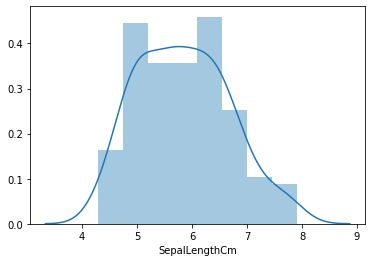

SepalWidthCm


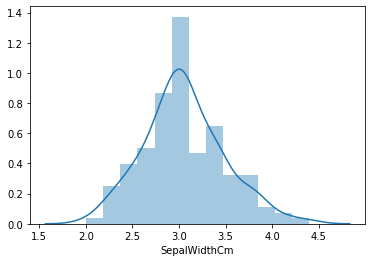

PetalLengthCm


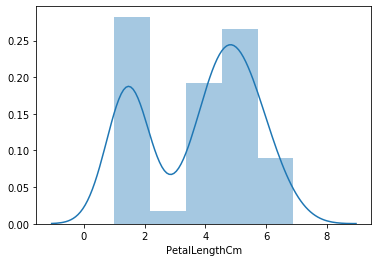

PetalWidthCm


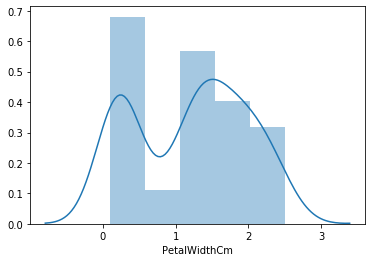

In [11]:
for i in data.columns[:-1]:
    print(i)
    sns.distplot(data[i])
    plt.show()

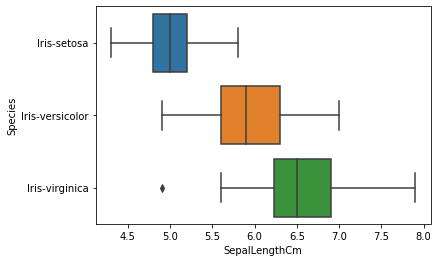

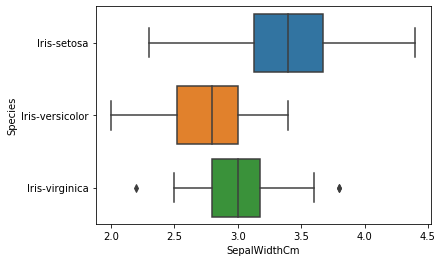

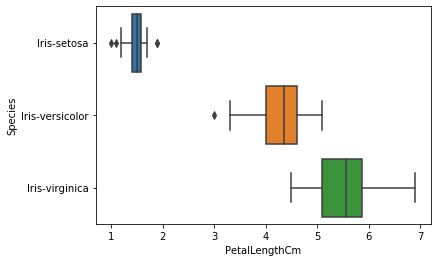

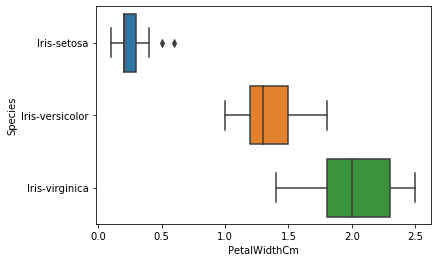

In [12]:
sns.boxplot(y = 'Species' , x = 'SepalLengthCm' , data = data)
plt.show()
sns.boxplot(y = 'Species' , x = 'SepalWidthCm' , data = data)
plt.show()
sns.boxplot(y = 'Species' , x = 'PetalLengthCm' , data = data)
plt.show()
sns.boxplot(y = 'Species' , x = 'PetalWidthCm' , data = data)
plt.show()

In [13]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
# We will check if the mean value of SepalLengthCm is same for all the species or not
# H0: Mean value for all the species are same
# H1: Mean value for all the species are not same

data_sepa_setosa = data[data['Species'] == 'Iris-setosa']['SepalLengthCm']
data_sepa_versi = data[data['Species'] == 'Iris-versicolor']['SepalLengthCm']
data_sepa_virgin = data[data['Species'] == 'Iris-virginica']['SepalLengthCm']
f_oneway(data_sepa_setosa , data_sepa_versi ,data_sepa_virgin)
# p value is less than 0.05 hence we can reject the null hypothesis


F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [15]:
usable_var = []
usable_var.append('SepalLengthCm')

In [16]:
# We will check if the mean value of SepalWidthCm is same for all the species or not
# H0: Mean value for all the species are same
# H1: Mean value for all the species are not same

data_sepalwidth_setosa = data[data['Species'] == 'Iris-setosa']['SepalWidthCm']
data_sepalwidth_versi = data[data['Species'] == 'Iris-versicolor']['SepalLengthCm']
data_sepalwidth_virgin = data[data['Species'] == 'Iris-virginica']['SepalLengthCm']
f_oneway(data_sepalwidth_setosa , data_sepalwidth_versi , data_sepalwidth_virgin)
# p value is less than 0.05 hence we can reject the null hypothesis

#usable_var.append('SepalLengthCm')

F_onewayResult(statistic=515.173198805457, pvalue=3.8579895318797265e-67)

In [17]:
usable_var.append('SepalWidthCm')

In [18]:
# We will check if the mean value of SepalWidthCm is same for all the species or not
# H0: Mean value for all the species are same
# H1: Mean value for all the species are not same

data_PetalLengthCm_setosa = data[data['Species'] == 'Iris-setosa']['PetalLengthCm']
data_PetalLengthCm_versi = data[data['Species'] == 'Iris-versicolor']['PetalLengthCm']
data_PetalLengthCm_virgin = data[data['Species'] == 'Iris-virginica']['PetalLengthCm']
f_oneway(data_PetalLengthCm_setosa , data_PetalLengthCm_versi , data_PetalLengthCm_virgin)
# p value is less than 0.05 hence we can reject the null hypothesis

F_onewayResult(statistic=1179.0343277002194, pvalue=3.0519758018278374e-91)

In [19]:
usable_var.append('PetalLengthCm')

In [20]:
# We will check if the mean value of SepalWidthCm is same for all the species or not
# H0: Mean value for all the species are same
# H1: Mean value for all the species are not same

data_PetalWidthCm_setosa = data[data['Species'] == 'Iris-setosa']['PetalWidthCm']
data_PetalWidthCm_versi = data[data['Species'] == 'Iris-versicolor']['PetalWidthCm']
data_PetalWidthCm_virgin = data[data['Species'] == 'Iris-virginica']['PetalWidthCm']
f_oneway(data_PetalWidthCm_setosa , data_PetalWidthCm_versi , data_PetalWidthCm_virgin)
# p value is less than 0.05 hence we can reject the null hypothesis

F_onewayResult(statistic=959.3244057257613, pvalue=4.376956957488959e-85)

In [21]:
usable_var.append('PetalWidthCm')

In [22]:
usable_var

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [23]:
# Lets define X & Y values for further modeling
X = data.drop('Species' , axis = 1)
Y = data['Species']
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [24]:
# Lets fit model using KNeighbour Method
KNN = KNeighborsClassifier()
KNN_Params = {'n_neighbors':np.arange(1,20) , 'weights':['uniform' , 'distance']}

In [25]:
KNN_GS = GridSearchCV(KNN , KNN_Params , cv = 5 , scoring = 'f1_weighted')
# Use GridSearchCV to find out the best parameters about of the model

In [26]:
KNN_GS.fit(X, Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [27]:
KNN_GS.best_params_
# Best parameters are n_neighbors as 10 & weights as distance

{'n_neighbors': 10, 'weights': 'distance'}

In [28]:
KNN_Final = KNeighborsClassifier(n_neighbors = 10 , weights = 'distance')
# Lets fit the final model for KNN

KNN: 0.046557 (0.001116)


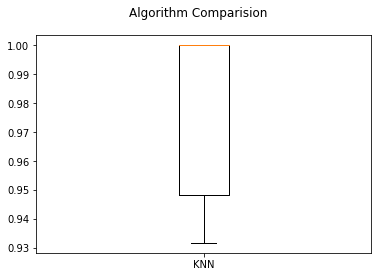

In [29]:
models = []
models.append(('KNN' , KNN_Final))

results = []
names = []
for name , model in models:
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'% (name, 1- np.mean(cv_results), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    
    fig = plt.figure()
    fig.suptitle('Algorithm Comparision')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [30]:
# Model Name: KNN
# Baise Error:0.046557 (0.001116)

In [31]:
GNB = GaussianNB()
# Lets fit Gaussion NB Model

KNN: 0.046557 (0.001116)


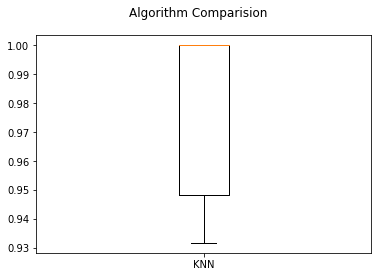

GNB: 0.046670 (0.000372)


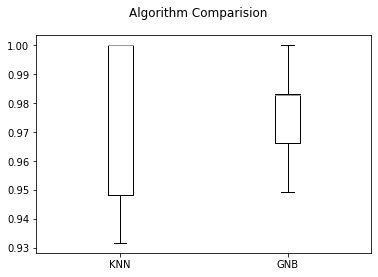

In [32]:
models = []
models.append(('KNN' , KNN_Final))
models.append(('GNB' , GNB))

results = []
names = []
for name , model in models:
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'% (name, 1- np.mean(cv_results), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    
    fig = plt.figure()
    fig.suptitle('Algorithm Comparision')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [33]:
DT = DecisionTreeClassifier()
DT_Params = {'criterion':['gini' , 'entropy'] , 'max_depth':np.arange(2,15) , 'min_samples_leaf':np.arange(2,25)}
GS_DT = GridSearchCV(DT , DT_Params , cv = 5 , scoring = 'f1_weighted')
GS_DT.fit(X , Y)
# Lets fit decision Tree Model

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [34]:
GS_DT.best_params_
# Best parameters for Decision Tree are Criterion as gini , max_depth = 3 and min_sample_leaf = 3

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}

In [35]:
Final_DT = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3 , min_samples_leaf = 3)
# Fit Decision Tree based on the best parameters

KNN: 0.046557 (0.001116)


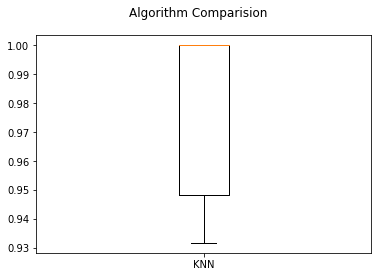

GNB: 0.046670 (0.000372)


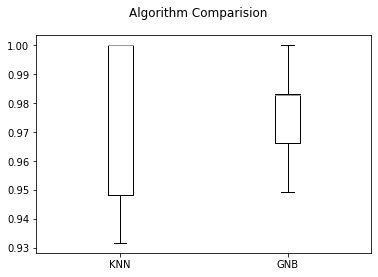

Decision Tree: 0.026667 (0.000345)


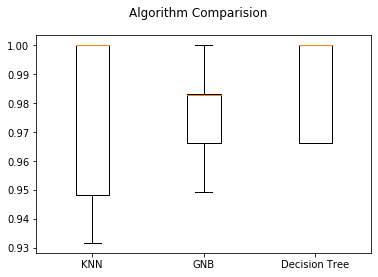

In [36]:
models = []
models.append(('KNN' , KNN_Final))
models.append(('GNB' , GNB))
models.append(('Decision Tree' , Final_DT))

results = []
names = []
for name , model in models:
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'% (name, 1- np.mean(cv_results), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    
    
    fig = plt.figure()
    fig.suptitle('Algorithm Comparision')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [37]:
RF = RandomForestClassifier(random_state = 5)
RF_Params = {'max_depth':np.arange(2,25) , 'criterion':['gini' , 'entropy'] ,'min_samples_leaf':np.arange(2,25) }
# Define Random Forest & Random Forest Parameters

In [38]:
GS_RF = GridSearchCV(RF , RF_Params , cv = 5 , scoring = 'f1_weighted')
GS_RF.fit(X, Y)
# Use GridSearchCV to find the best parameters

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [39]:
GS_RF.best_params_
# Best parameters are Criterion as entropy , Mac_depth = 3 and min_sample_leaf = 2

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2}

In [40]:
Final_RF = RandomForestClassifier(criterion = 'entropy' , max_depth = 3 , min_samples_leaf = 2)
# Final Random Forest Model

KNN: 0.046557 (0.001116)


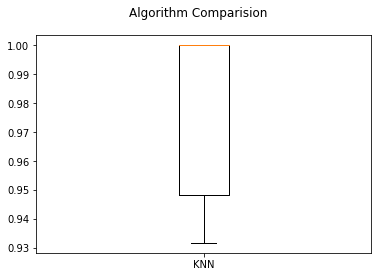

GNB: 0.046670 (0.000372)


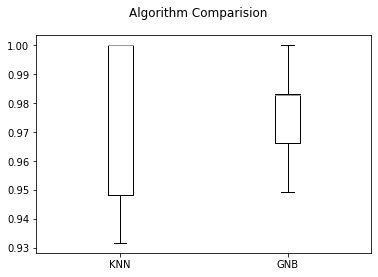

Decision Tree: 0.026667 (0.000345)


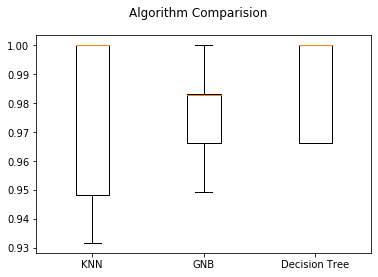

Random Forest: 0.040048 (0.000490)


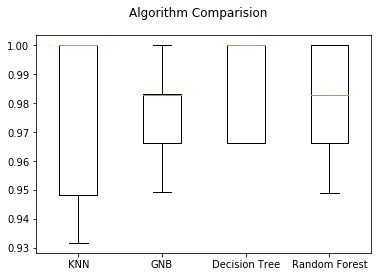

In [41]:
models = []
models.append(('KNN' , KNN_Final))
models.append(('GNB' , GNB))
models.append(('Decision Tree' , Final_DT))
models.append(('Random Forest' , Final_RF))

results = []
names = []
for name , model in models:
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'% (name, 1- np.mean(cv_results), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    
    
    fig = plt.figure()
    fig.suptitle('Algorithm Comparision')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [42]:
auc_avg = []
auc_var = []
for ne in np.arange(1,100):
    RF_KFold = RandomForestClassifier( criterion = 'entropy' , max_depth = 3 , min_samples_leaf = 2 , 
                                n_estimators = ne , random_state = 5)
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    auc = model_selection.cross_val_score(RF_KFold , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    auc_var.append(np.var(auc, ddof = 1))
    auc_avg.append(1 - np.mean(auc))
print(auc_var)
print(auc_avg)

[0.0009072689260164804, 0.0014538840816900682, 0.0008610491418790697, 0.001421014873807671, 0.001421014873807671, 0.0014291742365726283, 0.0014291742365726283, 0.0014291742365726283, 0.001421014873807671, 0.0014291742365726283, 0.00186899914550413, 0.00186899914550413, 0.00186899914550413, 0.002200414688269281, 0.0034952868199621457, 0.00186899914550413, 0.0030546266774157086, 0.0030546266774157086, 0.0030546266774157086, 0.0034952868199621457, 0.0030546266774157086, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0030546266774157086, 0.0030546266774157086, 0.0030546266774157086, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.0034952868199621457, 0.002200414688269281, 0.002200414688269281, 0

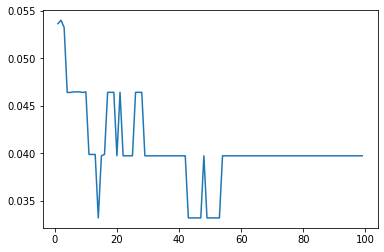

In [43]:
plt.plot(np.arange(1,100) , auc_avg)
plt.show()

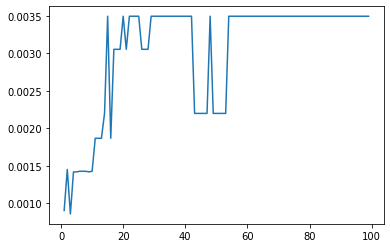

In [44]:
plt.plot(np.arange(1,100) , auc_var)
plt.show()

In [45]:
print('var_min: ' , np.argmin(auc_var)+1)
print('var_min: ' , np.min(auc_var))
print('Biase Error: ' , auc_avg[np.argmin(auc_var)])

var_min:  3
var_min:  0.0008610491418790697
Biase Error:  0.05325540690910624


In [46]:
print('avg_min: ' , np.argmin(auc_avg)+1)
print('avg_min: ' , np.min(auc_avg))
print('Var Error: ' , auc_var[np.argmin(auc_avg)])

avg_min:  14
avg_min:  0.033201970443349715
Var Error:  0.002200414688269281


In [47]:
(0.039861111111111125 - 0.03317700765281417)/0.039861111111111125

0.16768482543462732

In [48]:
RF_KFold = RandomForestClassifier( criterion = 'entropy' , max_depth = 3 , min_samples_leaf = 2 , 
                                n_estimators = 3 , random_state = 5)

KNN: 0.046557 (0.001116)


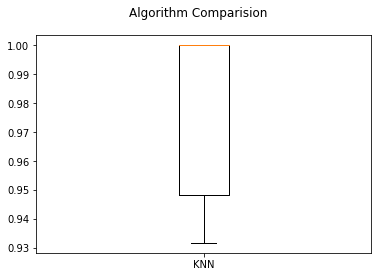

GNB: 0.046670 (0.000372)


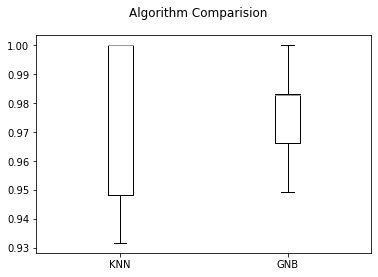

Decision Tree: 0.026667 (0.000345)


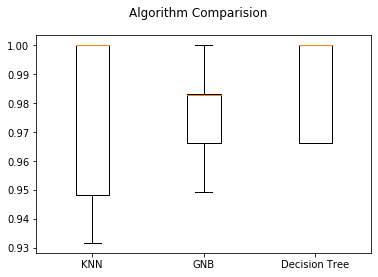

Random Forest: 0.040048 (0.000490)


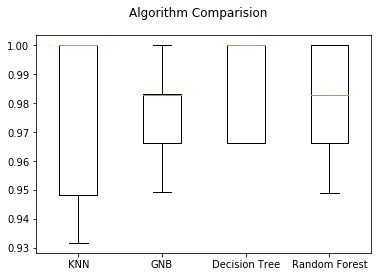

Random Forest KFold: 0.053255 (0.000230)


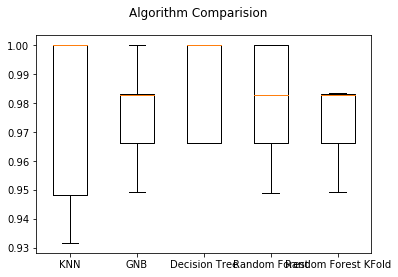

In [49]:
models = []
models.append(('KNN' , KNN_Final))
models.append(('GNB' , GNB))
models.append(('Decision Tree' , Final_DT))
models.append(('Random Forest' , Final_RF))
models.append(('Random Forest KFold' , RF_KFold))

results = []
names = []
for name , model in models:
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'% (name, 1- np.mean(cv_results), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    
    
    fig = plt.figure()
    fig.suptitle('Algorithm Comparision')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [50]:
RF = RandomForestClassifier(criterion = 'entropy' , max_depth = 3 , min_samples_leaf = 2 ,
                                n_estimators = ne , random_state = 5)
auc_avg = []
auc_var = []
for ne in np.arange(1,50):
    AB_RF = AdaBoostClassifier(base_estimator= RF , n_estimators = ne , random_state=0 )
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    auc = model_selection.cross_val_score(AB_RF , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    auc_var.append(np.var(auc, ddof = 1))
    auc_avg.append(1 - np.mean(auc))
print(auc_var)
print(auc_avg)


[0.0030494634354930445, 0.0058159348348853345, 0.005682939561242333, 0.002382123198487904, 0.002382123198487904, 0.003794382133600427, 0.002382123198487904, 0.002382123198487904, 0.002382123198487904, 0.002382123198487904, 0.002382123198487904, 0.002382123198487904, 0.002382123198487904, 0.0014158575227616618, 0.0014158575227616618, 0.0014158575227616618, 0.0018573451756228165, 0.0018573451756228165, 0.0018573451756228165, 0.0018573451756228165, 0.0018573451756228165, 0.0018573451756228165, 0.0018573451756228165, 0.0018573451756228165, 0.0018573451756228165, 0.0018573451756228165, 0.0018573451756228165, 0.003068472367070891, 0.003068472367070891, 0.003068472367070891, 0.003068472367070891, 0.004768960335365122, 0.00987306419665507, 0.00987306419665507, 0.00987306419665507, 0.017880145399063248, 0.017880145399063248, 0.017880145399063248, 0.023331748712968323, 0.023331748712968323, 0.023331748712968323, 0.023331748712968323, 0.03003343576905295, 0.03003343576905295, 0.03003343576905295,

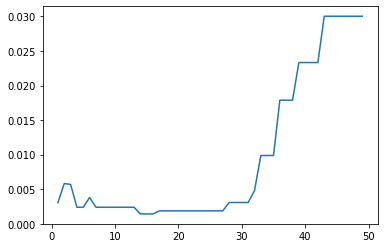

In [51]:
plt.plot(np.arange(1,50) , auc_var)
plt.show()

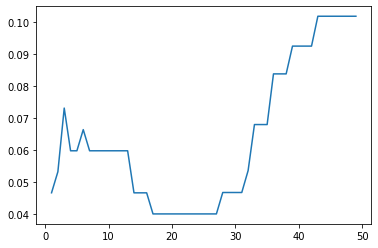

In [52]:
plt.plot(np.arange(1,50) , auc_avg)
plt.show()

In [53]:
print('var_min: ' , np.argmin(auc_var)+1)
print('var_min: ' , np.min(auc_var))
print('Biase Error: ' , auc_avg[np.argmin(auc_var)])

var_min:  14
var_min:  0.0014158575227616618
Biase Error:  0.046572031804678615


In [54]:
print('avg_min: ' , np.argmin(auc_avg)+1)
print('avg_min: ' , np.min(auc_avg))
print('Var Error: ' , auc_var[np.argmin(auc_avg)])

avg_min:  17
avg_min:  0.039986336797930955
Var Error:  0.0018573451756228165


In [55]:
print((auc_var[np.argmin(auc_avg)] - np.min(auc_var))/auc_var[np.argmin(auc_avg)])
print((auc_avg[np.argmin(auc_var)] - np.min(auc_avg))/auc_avg[np.argmin(auc_var)])

0.23769822575553964
0.14140879733072034


In [56]:
AB_RF = AdaBoostClassifier(base_estimator= RF , n_estimators = 2 , random_state=0 )

KNN: 0.046557 (0.001116)


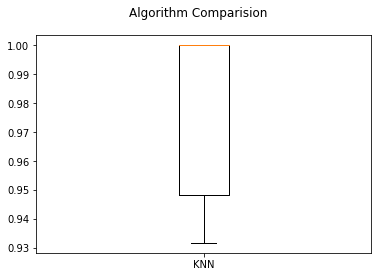

GNB: 0.046670 (0.000372)


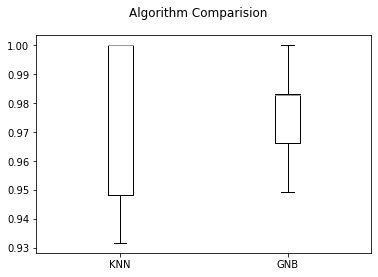

Decision Tree: 0.026667 (0.000345)


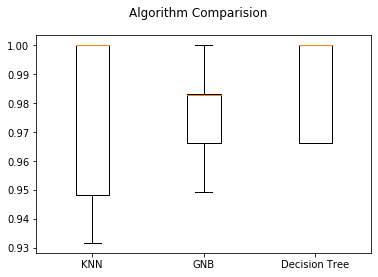

Random Forest: 0.040048 (0.000490)


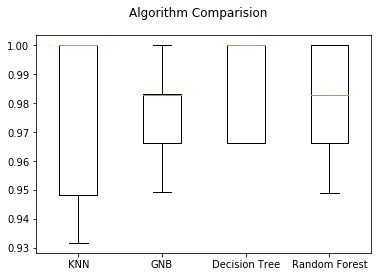

Random Forest KFold: 0.053255 (0.000230)


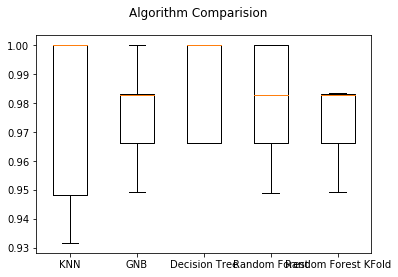

AdaBoost Random Forest: 0.053162 (0.001577)


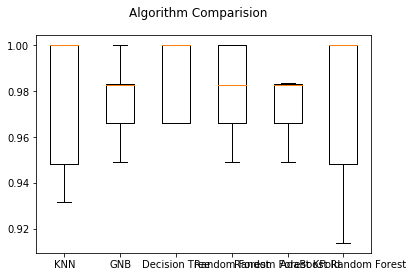

In [57]:
models = []
models.append(('KNN' , KNN_Final))
models.append(('GNB' , GNB))
models.append(('Decision Tree' , Final_DT))
models.append(('Random Forest' , Final_RF))
models.append(('Random Forest KFold' , RF_KFold))
models.append(('AdaBoost Random Forest' , AB_RF))

results = []
names = []
for name , model in models:
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'% (name, 1- np.mean(cv_results), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    
    
    fig = plt.figure()
    fig.suptitle('Algorithm Comparision')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [58]:
DT = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3 , min_samples_leaf = 3)
auc_avg = []
auc_var = []
for ne in np.arange(1,50):
    AB_DT_BASE = AdaBoostClassifier(base_estimator= DT , n_estimators = ne , random_state=0 )
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    auc = model_selection.cross_val_score(AB_DT_BASE , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    auc_var.append(np.var(auc, ddof = 1))
    auc_avg.append(1 - np.mean(auc))
print(auc_var)
print(auc_avg)

[0.0013333333333333329, 0.002700141878699366, 0.001465959728923168, 0.0007485928647112027, 0.0014136413782577504, 0.0014136413782577504, 0.0014136413782577504, 0.0014136413782577504, 0.0007485928647112027, 0.0014136413782577504, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0018664980510256315, 0.0018664980510256315, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916928137268, 0.0014239916

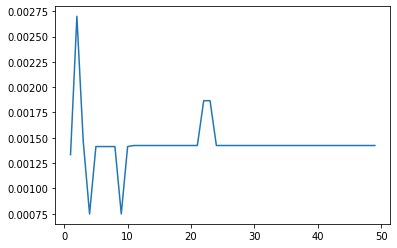

In [59]:
plt.plot(np.arange(1,50) , auc_var)
plt.show()

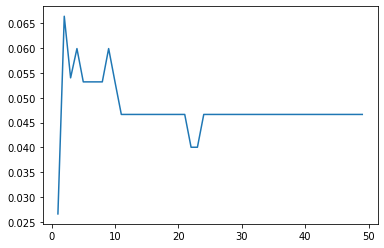

In [60]:
plt.plot(np.arange(1,50) , auc_avg)
plt.show()

In [61]:
print('var_min: ' , np.argmin(auc_var)+1)
print('var_min: ' , np.min(auc_var))
print('Biase Error: ' , auc_avg[np.argmin(auc_var)])

var_min:  4
var_min:  0.0007485928647112027
Biase Error:  0.05985327884904412


In [62]:
print('avg_min: ' , np.argmin(auc_avg)+1)
print('avg_min: ' , np.min(auc_avg))
print('Var Error: ' , auc_var[np.argmin(auc_avg)])

avg_min:  1
avg_min:  0.026666666666666616
Var Error:  0.0013333333333333329


In [63]:
print((auc_var[np.argmin(auc_avg)] - np.min(auc_var))/auc_var[np.argmin(auc_avg)])
print((auc_avg[np.argmin(auc_var)] - np.min(auc_avg))/auc_avg[np.argmin(auc_var)])

0.4385553514665978
0.5544660680340908


In [64]:
AB_DT = AdaBoostClassifier(base_estimator= DT , n_estimators = 1 , random_state=0)

KNN: 0.046557 (0.001116)


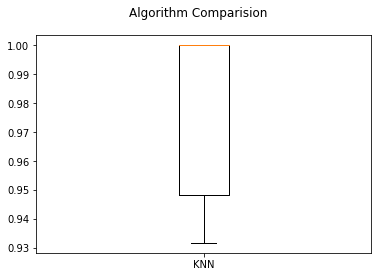

GNB: 0.046670 (0.000372)


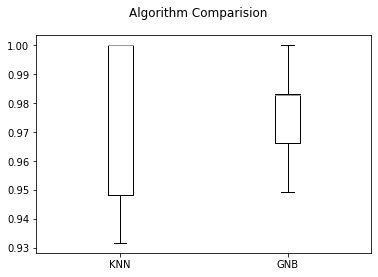

Decision Tree: 0.026667 (0.000345)


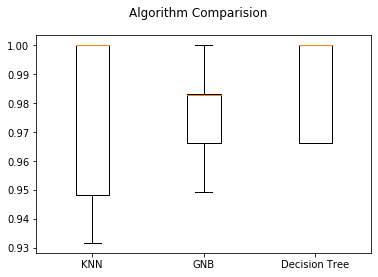

Random Forest: 0.039740 (0.000933)


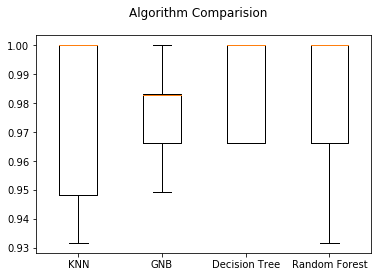

Random Forest KFold: 0.053255 (0.000230)


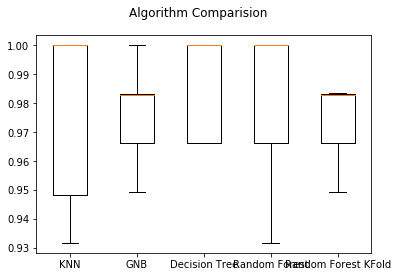

AdaBoost Random Forest: 0.053162 (0.001577)


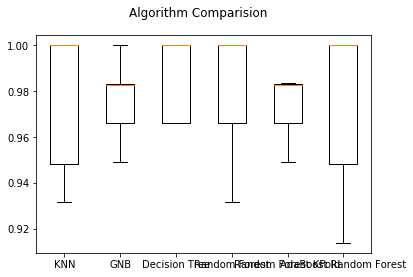

AdaBoost Decision Tree: 0.026667 (0.000345)


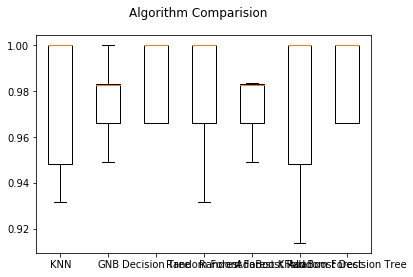

In [65]:
models = []
models.append(('KNN' , KNN_Final))
models.append(('GNB' , GNB))
models.append(('Decision Tree' , Final_DT))
models.append(('Random Forest' , Final_RF))
models.append(('Random Forest KFold' , RF_KFold))
models.append(('AdaBoost Random Forest' , AB_RF))
models.append(('AdaBoost Decision Tree' , AB_DT))

results = []
names = []
for name , model in models:
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'% (name, 1- np.mean(cv_results), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    
    
    fig = plt.figure()
    fig.suptitle('Algorithm Comparision')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [66]:
GNB = GaussianNB()
auc_avg = []
auc_var = []
for ne in np.arange(1,20):
    AB_NB = AdaBoostClassifier(base_estimator= GNB , n_estimators = ne , random_state=0 )
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    auc = model_selection.cross_val_score(AB_NB , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    auc_var.append(np.var(auc, ddof = 1))
    auc_avg.append(1 - np.mean(auc))
print(auc_var)
print(auc_avg)

[0.0014125734698738524, 0.002507153820545877, 0.012788415056062121, 0.03125825265606053, 0.003123218904685706, 0.02716170251007211, 0.07614373720168616, 0.019821057729666556, 0.0053478715606270245, 0.0046236867391588315, 0.008911885860803062, 0.0041579248547745015, 0.001847483047228135, 0.0056824957221949, 0.002511997830551988, 0.00028827696296733626, 0.0005383868525604496, 0.0032198189037452377, 0.0048294454830919474]
[0.04666971190235869, 0.05300932985143514, 0.19847942533229923, 0.1789969619007732, 0.08702056799882896, 0.18090073669021045, 0.3386314862525388, 0.2602175310070046, 0.0679920776391365, 0.06050833457729998, 0.14209909586167058, 0.0652782033891478, 0.05955476072961596, 0.07921867888111078, 0.07381349729175812, 0.08042861202451979, 0.06627849817781173, 0.08131750091340884, 0.09552953049694235]


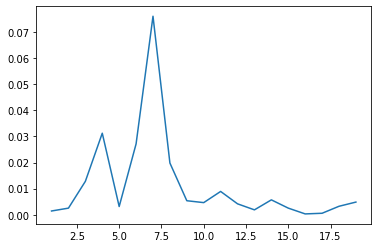

In [67]:
plt.plot(np.arange(1,20) , auc_var)
plt.show()

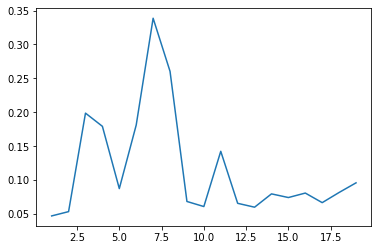

In [68]:
plt.plot(np.arange(1,20) , auc_avg)
plt.show()

In [69]:
print('avg_min: ' , np.argmin(auc_avg)+1)
print('avg_min: ' , np.min(auc_avg))
print('Var Error: ' , auc_var[np.argmin(auc_avg)])

avg_min:  1
avg_min:  0.04666971190235869
Var Error:  0.0014125734698738524


In [70]:
print('var_min: ' , np.argmin(auc_var)+1)
print('var_min: ' , np.min(auc_var))
print('Biase Error: ' , auc_avg[np.argmin(auc_var)])

var_min:  16
var_min:  0.00028827696296733626
Biase Error:  0.08042861202451979


In [71]:
(0.08042861202451979 - 0.04666971190235869)/0.08042861202451979

0.41973744507575517

In [72]:
(0.0014125734698738524 - 0.00028827696296733626)/0.0014125734698738524

0.7959207297068377

In [73]:
AB_NB = AdaBoostClassifier(base_estimator= GNB , n_estimators = 16 , random_state=0 )

KNN: 0.046557 (0.001116)


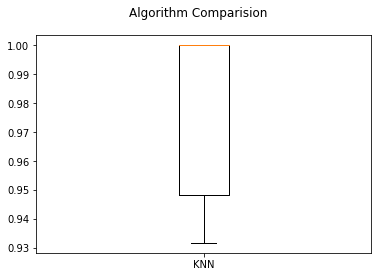

GNB: 0.046670 (0.000372)


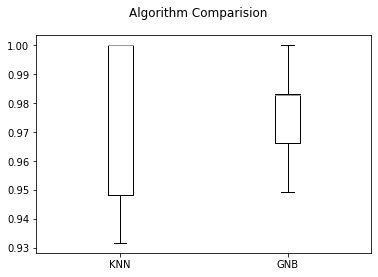

Decision Tree: 0.026667 (0.000345)


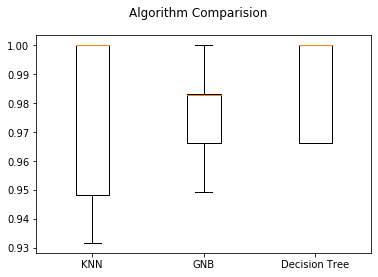

Random Forest: 0.033202 (0.000577)


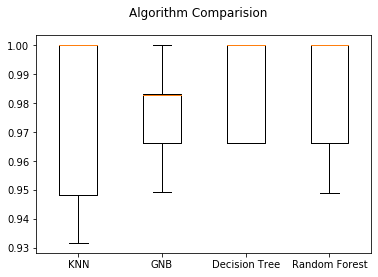

Random Forest KFold: 0.053255 (0.000230)


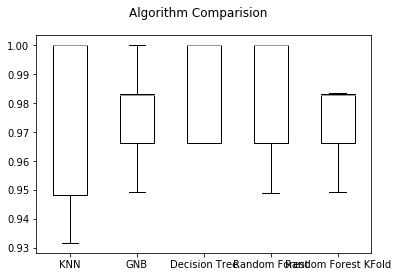

AdaBoost Random Forest: 0.053162 (0.001577)


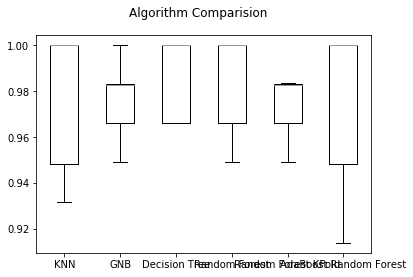

AdaBoost Decision Tree: 0.026667 (0.000345)


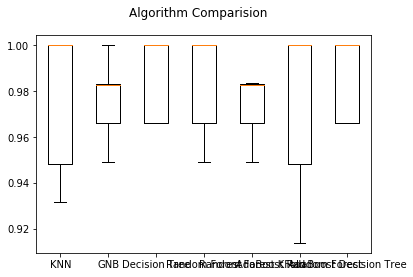

AdaBoost GNB: 0.080429 (0.000079)


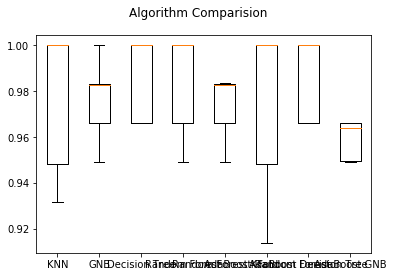

In [74]:
models = []
models.append(('KNN' , KNN_Final))
models.append(('GNB' , GNB))
models.append(('Decision Tree' , Final_DT))
models.append(('Random Forest' , Final_RF))
models.append(('Random Forest KFold' , RF_KFold))
models.append(('AdaBoost Random Forest' , AB_RF))
models.append(('AdaBoost Decision Tree' , AB_DT))
models.append(('AdaBoost GNB' , AB_NB))

results = []
names = []
for name , model in models:
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'% (name, 1- np.mean(cv_results), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    
    
    fig = plt.figure()
    fig.suptitle('Algorithm Comparision')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [75]:
auc_var=[]
auc_avg= []

for ne in np.arange(1,100):
    GBC = GradientBoostingClassifier( n_estimators = ne , random_state=0 )
    kfold = model_selection.KFold(shuffle = True , n_splits = 3 , random_state = 0)
    auc = model_selection.cross_val_score(GBC , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    auc_var.append(np.var(auc, ddof = 1))
    auc_avg.append(1 - np.mean(auc))
print(auc_var)
print(auc_avg)

[0.00013127676660862247, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260524345057737, 0.0001260

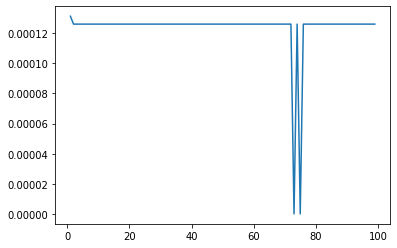

In [76]:
plt.plot(np.arange(1,100) , auc_var)
plt.show()

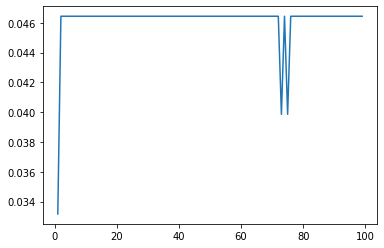

In [77]:
plt.plot(np.arange(1,100) , auc_avg)
plt.show()

In [78]:
print('avg_min: ' , np.argmin(auc_avg)+1)
print('avg_min: ' , np.min(auc_avg))
print('Var Error: ' , auc_var[np.argmin(auc_avg)])

avg_min:  1
avg_min:  0.03317700765281417
Var Error:  0.00013127676660862247


In [79]:
print('var_min: ' , np.argmin(auc_var)+1)
print('var_min: ' , np.min(auc_var))
print('Biase Error: ' , auc_avg[np.argmin(auc_var)])

var_min:  73
var_min:  3.009259259258596e-08
Biase Error:  0.039861111111111125


In [80]:
GBC = GradientBoostingClassifier( n_estimators = 73 , random_state=0 )

KNN: 0.046557 (0.001116)


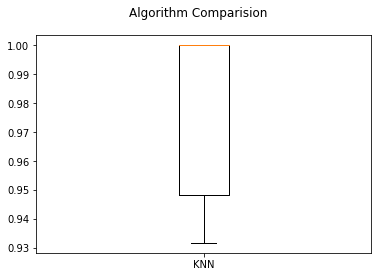

GNB: 0.046670 (0.000372)


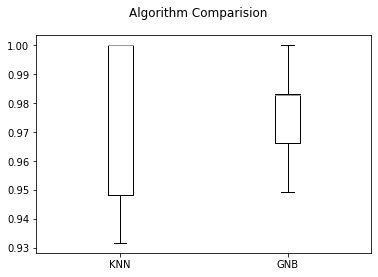

Decision Tree: 0.026667 (0.000345)


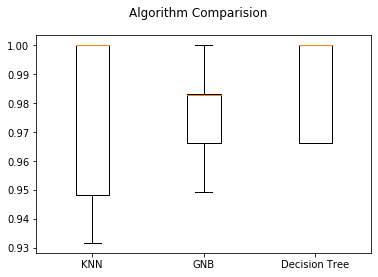

Random Forest: 0.039740 (0.000933)


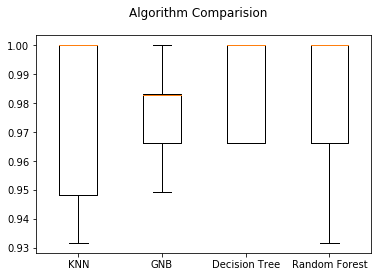

Random Forest KFold: 0.053255 (0.000230)


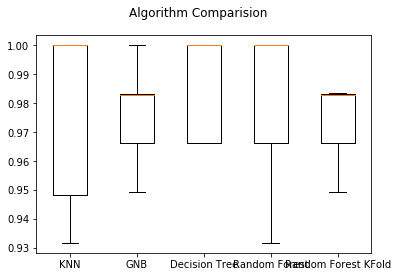

AdaBoost Random Forest: 0.053162 (0.001577)


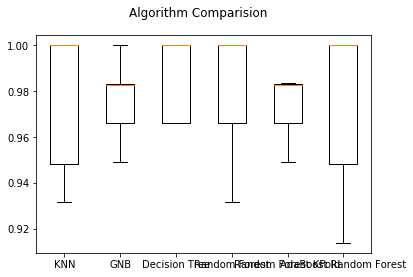

AdaBoost Decision Tree: 0.026667 (0.000345)


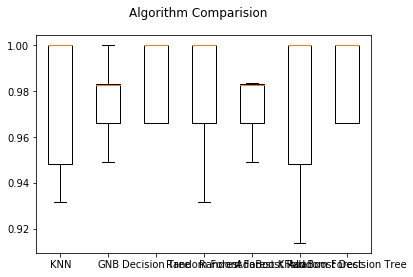

AdaBoost GNB: 0.080429 (0.000079)


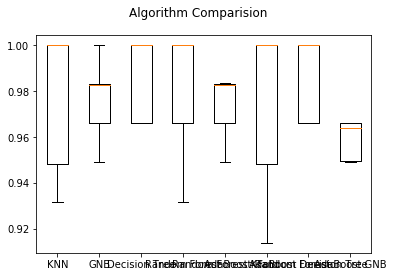

Gradient Boosting Classifier: 0.039726 (0.000488)


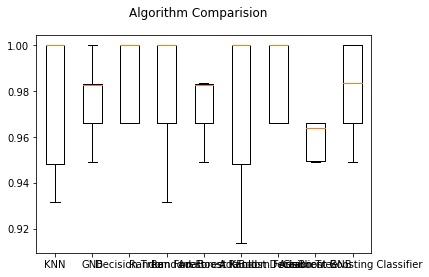

In [81]:
models = []
models.append(('KNN' , KNN_Final))
models.append(('GNB' , GNB))
models.append(('Decision Tree' , Final_DT))
models.append(('Random Forest' , Final_RF))
models.append(('Random Forest KFold' , RF_KFold))
models.append(('AdaBoost Random Forest' , AB_RF))
models.append(('AdaBoost Decision Tree' , AB_DT))
models.append(('AdaBoost GNB' , AB_NB))
models.append(('Gradient Boosting Classifier' , GBC))

results = []
names = []
for name , model in models:
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'% (name, 1- np.mean(cv_results), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    
    
    fig = plt.figure()
    fig.suptitle('Algorithm Comparision')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [82]:
GNB = GaussianNB()
auc_var=[]
auc_avg= []

for ne in np.arange(1,50):
    BC_NB = BaggingClassifier(base_estimator= GNB , n_estimators = ne , random_state=0 )
    kfold = model_selection.KFold(shuffle = True , n_splits = 3 , random_state = 0)
    auc = model_selection.cross_val_score(BC_NB , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    auc_var.append(np.var(auc, ddof = 1))
    auc_avg.append(1 - np.mean(auc))
print(auc_var)
print(auc_avg)

[0.0005288056027966719, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 0.00012713558507253578, 0.00012713558507253578, 0.00012713558507253578, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 1.508408919123142e-07, 0.00012713558507253578, 0.00012713558507253578, 0.00012713558507253578, 1.508408919123142e-07, 1.508408919123142e-07, 0.00012713558507253578, 0.00012713558507253578, 0.00012713558507253578, 0.00012713558507253578, 0.00012713558507253578, 0.00012713558507253578, 0.00012713558507253578, 0.000127135585072535

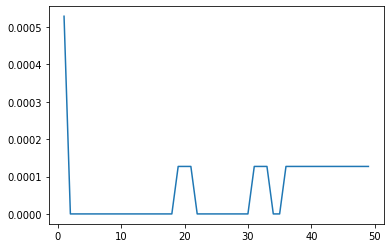

In [83]:
plt.plot(np.arange(1,50) , auc_var)
plt.show()

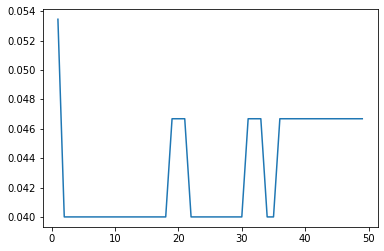

In [84]:
plt.plot(np.arange(1,50) , auc_avg)
plt.show()

In [85]:
print('avg_min: ' , np.argmin(auc_avg)+1)
print('avg_min: ' , np.min(auc_avg))
print('Var Error: ' , auc_var[np.argmin(auc_avg)])

avg_min:  2
avg_min:  0.040003968253968236
Var Error:  1.508408919123142e-07


In [86]:
print('var_min: ' , np.argmin(auc_var)+1)
print('var_min: ' , np.min(auc_var))
print('Biase Error: ' , auc_avg[np.argmin(auc_var)])

var_min:  2
var_min:  1.508408919123142e-07
Biase Error:  0.040003968253968236


In [87]:
BC_NB = BaggingClassifier(base_estimator= GNB , n_estimators = 2 , random_state=0 )

KNN: 0.046557 (0.001116)


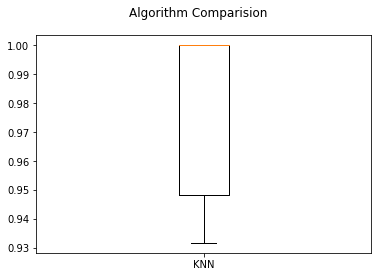

GNB: 0.046670 (0.000372)


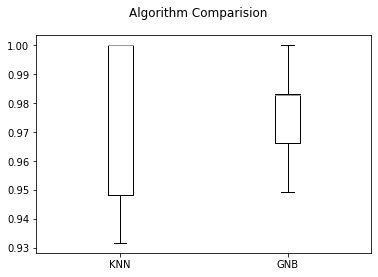

Decision Tree: 0.026667 (0.000345)


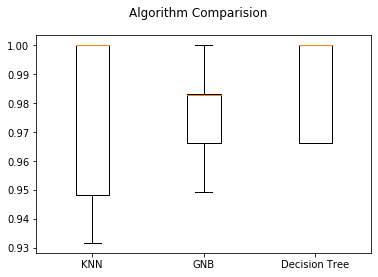

Random Forest: 0.046586 (0.000816)


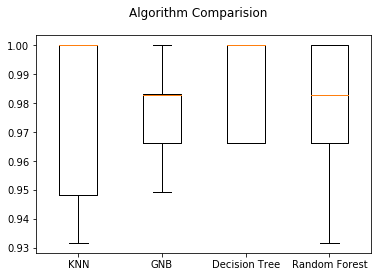

Random Forest KFold: 0.053255 (0.000230)


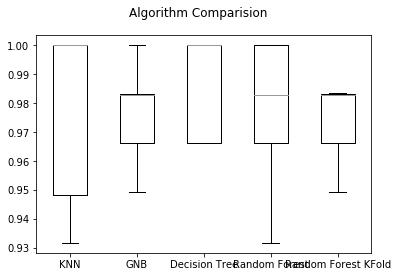

AdaBoost Random Forest: 0.053162 (0.001577)


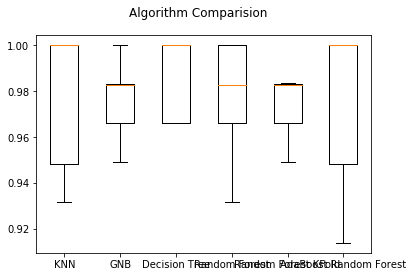

AdaBoost Decision Tree: 0.026667 (0.000345)


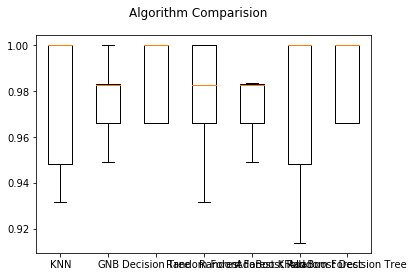

AdaBoost GNB: 0.080429 (0.000079)


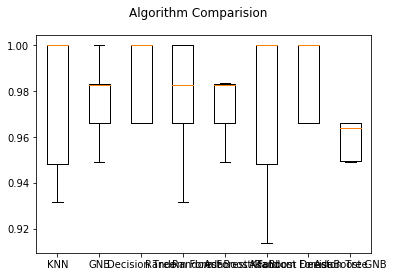

Gradient Boosting Classifier: 0.039726 (0.000488)


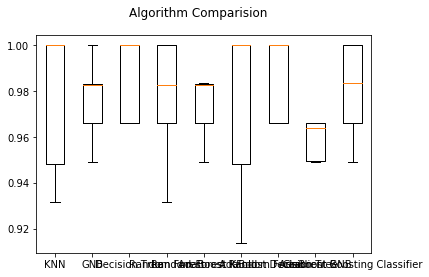

Bagging Classifier GNB: 0.033140 (0.000574)


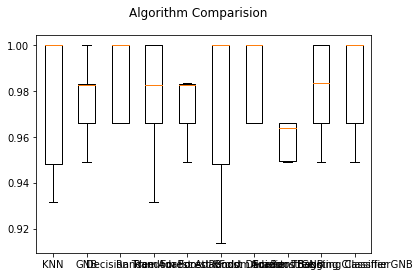

In [88]:
models = []
models.append(('KNN' , KNN_Final))
models.append(('GNB' , GNB))
models.append(('Decision Tree' , Final_DT))
models.append(('Random Forest' , Final_RF))
models.append(('Random Forest KFold' , RF_KFold))
models.append(('AdaBoost Random Forest' , AB_RF))
models.append(('AdaBoost Decision Tree' , AB_DT))
models.append(('AdaBoost GNB' , AB_NB))
models.append(('Gradient Boosting Classifier' , GBC))
models.append(('Bagging Classifier GNB' , BC_NB))

results = []
names = []
for name , model in models:
    kfold = model_selection.KFold(shuffle = True , n_splits = 5 , random_state = 0)
    cv_results = model_selection.cross_val_score(model , X , Y , cv = kfold , 
                                                 scoring = 'f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)'% (name, 1- np.mean(cv_results), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    
    
    fig = plt.figure()
    fig.suptitle('Algorithm Comparision')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [89]:
model_data = {'Name':['KNN' , 'GNB' , 'Decision Tree' , 'Random Forest' , 'AdaBoost Random Forest' ,
                      'AdaBoost Decision Tree' , 'AdaBoost GNB' , 'Gradient Boosting Classifier' , 
                      'Bagging Classifier GNB'],
             'Biase Erro':[0.046557 , 0.046670 , 0.026667 , 0.033202 , 0.053255 , 0.046572 , 0.026667 , 0.080429 ,
                           0.039726],
             'Variance Error':[0.001116 , 0.000372 , 0.000345 , 0.000577 , 0.000230 , 0.000373 , 0.000345 , 0.000079 , 
                              0.000488]}

models_info = pd.DataFrame(model_data)
# KNN: 0.046557 (0.001116)
# GNB: 0.046670 (0.000372)
# Decision Tree: 0.026667 (0.000345)
# Random Forest: 0.033202 (0.000577)
# Random Forest KFold: 0.053255 (0.000230)
# AdaBoost Random Forest: 0.046572 (0.000373)
# AdaBoost Decision Tree: 0.026667 (0.000345)
# AdaBoost GNB: 0.080429 (0.000079)
# Gradient Boosting Classifier: 0.039726 (0.000488)
# Bagging Classifier GNB: 0.033140 (0.000574)

In [90]:
models_info

,Name,Biase Erro,Variance Error
0,KNN,0.046557,0.001116
1,GNB,0.046670,0.000372
2,Decision Tree,0.026667,0.000345
3,Random Forest,0.033202,0.000577
4,AdaBoost Random Forest,0.053255,0.000230
5,AdaBoost Decision Tree,0.046572,0.000373
6,AdaBoost GNB,0.026667,0.000345
7,Gradient Boosting Classifier,0.080429,0.000079
8,Bagging Classifier GNB,0.039726,0.000488


In [91]:
models_info[models_info['Biase Erro'] == models_info['Biase Erro'].min()]

,Name,Biase Erro,Variance Error
2,Decision Tree,0.026667,0.000345
6,AdaBoost GNB,0.026667,0.000345


In [92]:
models_info[models_info['Variance Error'] == models_info['Variance Error'].min()]

,Name,Biase Erro,Variance Error
7,Gradient Boosting Classifier,0.080429,0.000079


In [93]:
# Based on the variance error & biase error we conclude that Decision Tree is the best fit model among all the models.

In [94]:
Final_Model = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3 , min_samples_leaf = 3)